<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%22Copy_of_Copy_of_Card_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader,random_split
import torch.nn.functional as F
import glob

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# from torchinfo import summary
from torchsummary import summary
import pathlib
from PIL import Image
from torchvision.transforms import transforms
from torch.optim import Adam

import torchvision.transforms as T

In [ ]:
!pip install torchinfo

In [ ]:
!wget -O carta.zip https://www.dropbox.com/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u&dl=0

--2023-07-18 15:28:53--  https://www.dropbox.com/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u [following]
--2023-07-18 15:28:54--  https://www.dropbox.com/e/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a978a1508d8cebe24574546b1.dl.dropboxusercontent.com/cd/0/get/CAGeB2dM_XI25bvOd-3Nx3kz21R4TK-PPp5r04x9o3LKTeItoZpvcYjwsm1V9iCQ1ClA9kPrc03ILGwt9T3z7QjObEMwdthcUSlUE-BEHM2b6MI44LzMbER-cnUCD5GjGpi6OL3OCFPaDCh6Fw-Dd_WM4xmJREG2AX_Ic2Jo_fL090Y0bhAHOQoeD4agka1CWdE/file# [following]
--2023-07-18 15:28:5

In [ ]:
!unzip carta.zip

Streaming output truncated to the last 5000 lines.
  inflating: Karta/tren/Dama_chillik/075.jpg  
  inflating: Karta/tren/Dama_chillik/076 - Copy (2).jpg  
  inflating: Karta/tren/Dama_chillik/076 - Copy - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/076 - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/076.jpg  
  inflating: Karta/tren/Dama_chillik/077 - Copy (2).jpg  
  inflating: Karta/tren/Dama_chillik/077 - Copy - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/077 - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/077.jpg  
  inflating: Karta/tren/Dama_chillik/078 - Copy (2).jpg  
  inflating: Karta/tren/Dama_chillik/078 - Copy - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/078 - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/078.jpg  
  inflating: Karta/tren/Dama_chillik/079 - Copy (2).jpg  
  inflating: Karta/tren/Dama_chillik/079 - Copy - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/079 - Copy.jpg  
  inflating: Karta/tren/Dama_chillik/079.jpg  
  inflating: Karta/tre

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
from torchvision.models import vgg19,resnet18

In [ ]:
transform = T.Compose([
    T.Resize(size=(256,256)),
    T.ToTensor()
])

In [ ]:
train_path = pathlib.Path('/content/Karta/tren')
test_path = pathlib.Path('/content/Karta/test')

In [ ]:
class Cards(Dataset):

  def __init__(self, path, transform):
    self.data = list(path.glob('*/*.jpg'))
    self.transform = transform

  def __getitem__(self, index):
    image = Image.open(self.data[index])
    image = self.transform(image)

    label= {
            "2_chillik":0,
            "2_krpi":1,
            "2_olma":2,
            "2_qarga":3,

            "3_chillik":4,
            "3_krpi":5,
            "3_olma":6,
            "3_qarga":7,

            "4_chillik":8,
            "4_krpi":9,
            "4_olma":10,
            "4_qarga":11,

            "5_chillik":12,
            "5_krpi":13,
            "5_olma":14,
            "5_qarga":15,

            "6_chillik":16,
            "6_krpi":17,
            "6_olma":18,
            "6_qarga":19,

            "7_chillik":20,
            "7_krpi":21,
            "7_olma":22,
            "7_qarga":23,

            "8_chillik":24,
            "8_krpi":25,
            "8_olma":26,
            "8_qarga":27,

            "9_chillik":28,
            "9_krpi":29,
            "9_olma":30,
            "9_qarga":31,

            "Dama_chillik":32,
            "Dama_krpi":33,
            "Dama_olma":34,
            "Dama_qarga":35,

            "Karol_chillik":36,
            "Karol_krpi":37,
            "Karol_olma":38,
            "Karol_qarga":39,

            "Tuz_chillik":40,
            "Tuz_krpi":41,
            "Tuz_olma":42,
            "Tuz_qarga":43,

            "10_chillik":44,
            "10_krpi":45,
            "10_olma":46,
            "10_qarga":47,
        }

    label = label.get((self.data[index]).parts[-2])
    label = torch.tensor(label,dtype=torch.int64)
    # print(image.shape)
    return image,label

  def __len__(self):
    return len(self.data)

In [ ]:
train_data = Cards(train_path, transform)
test_data = Cards(test_path, transform)

In [ ]:
x,y =next(iter(train_data))

In [ ]:
x.shape

torch.Size([3, 256, 256])

In [ ]:
# train_data[0]

In [ ]:
trainloader = DataLoader(train_data, batch_size=64,shuffle=True)
testloader = DataLoader(test_data, batch_size=64,shuffle=True)
fortest = DataLoader(test_data, batch_size=len(test_data),shuffle=True)

In [ ]:
x,y =next(iter(trainloader))

In [ ]:
x.shape

torch.Size([64, 3, 256, 256])

In [ ]:
y.shape

torch.Size([64])

In [ ]:
My_model = resnet18()
My_model

In [ ]:
My_model.fc =  torch.nn.Linear(in_features=512,out_features=48)

In [ ]:
My_model

In [ ]:
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(My_model.parameters(),lr=learning_rate)

In [ ]:
num_epochs = 1

In [ ]:
class Trainer:
    def __init__(self, model, train_dataloader, test_dataloader, criterion, optimizer, epochs=3):
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.criterion = criterion
        self.optimizer = optimizer

        self.epochs = epochs
        self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[]}

    def train_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.train_dataloader)
        for i, (data,label) in enumerate(tqdm(self.train_dataloader)):
            # print(data.shape)
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            # find loss
            loss = self.criterion(output, label)

            sum_loss += loss.item()
            n_corrects = (output.argmax(axis=1)==label).sum().item()
            sum_accuracy += n_corrects/label.size(0)

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()


        train_loss = sum_loss/n
        train_accuracy = sum_accuracy/n

        self.history['loss'].append(train_loss)
        self.history['acc'].append(train_accuracy)

        return train_loss, train_accuracy

    def validation_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.test_dataloader)
        for i, (data,label) in enumerate(tqdm(self.test_dataloader)):
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            print(output.shape)
            print(label.shape)
            # find loss
            loss = self.criterion(output, label)
            n_corrects = (output.argmax(axis=1)==label).sum().item()

            sum_loss += loss.item()
            sum_accuracy += n_corrects/label.size(0)

        val_loss = sum_loss/n
        val_accuracy = sum_accuracy/n

        self.history['val_loss'].append(val_loss)
        self.history['val_acc'].append(val_accuracy)

        return val_loss, val_accuracy

    def train(self):
        for epoch in range(num_epochs):
            train_loss, train_acc = self.train_loop()
            val_loss, val_acc = self.validation_loop()
            print()
            print(f'Epoch[{epoch+1}/{num_epochs}] \t train_loss: {train_loss:.5f}, train_acc: {train_acc:.2f} \t val_loss: {val_loss:.5f} \t val_acc: {val_acc:.2}')

In [ ]:
trainer = Trainer(
    model = My_model.to(device),
    train_dataloader = trainloader,
    test_dataloader = testloader,
    criterion=criterion,
    optimizer=optimizer
)

In [ ]:
x = np.ones((64))
y = np.ones((64,48))
print(x@y)

[64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.
 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.
 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.]


In [ ]:
trainer.train()

 25%|██▌       | 1/4 [00:00<00:01,  2.65it/s]

torch.Size([64, 48])
torch.Size([64])


 50%|█████     | 2/4 [00:00<00:00,  2.58it/s]

torch.Size([64, 48])
torch.Size([64])


 75%|███████▌  | 3/4 [00:01<00:00,  2.98it/s]

torch.Size([64, 48])
torch.Size([64])


100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

torch.Size([43, 48])
torch.Size([43])

Epoch[1/1] 	 train_loss: 0.08982, train_acc: 0.94 	 val_loss: 0.72381 	 val_acc: 0.85


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
img, label = next(iter(fortest))
pred = My_model(img.to(device))
pred = pred.argmax(axis=1)
pred = pred.detach().cpu()

In [ ]:
cm = confusion_matrix(label, pred)

<Axes: >

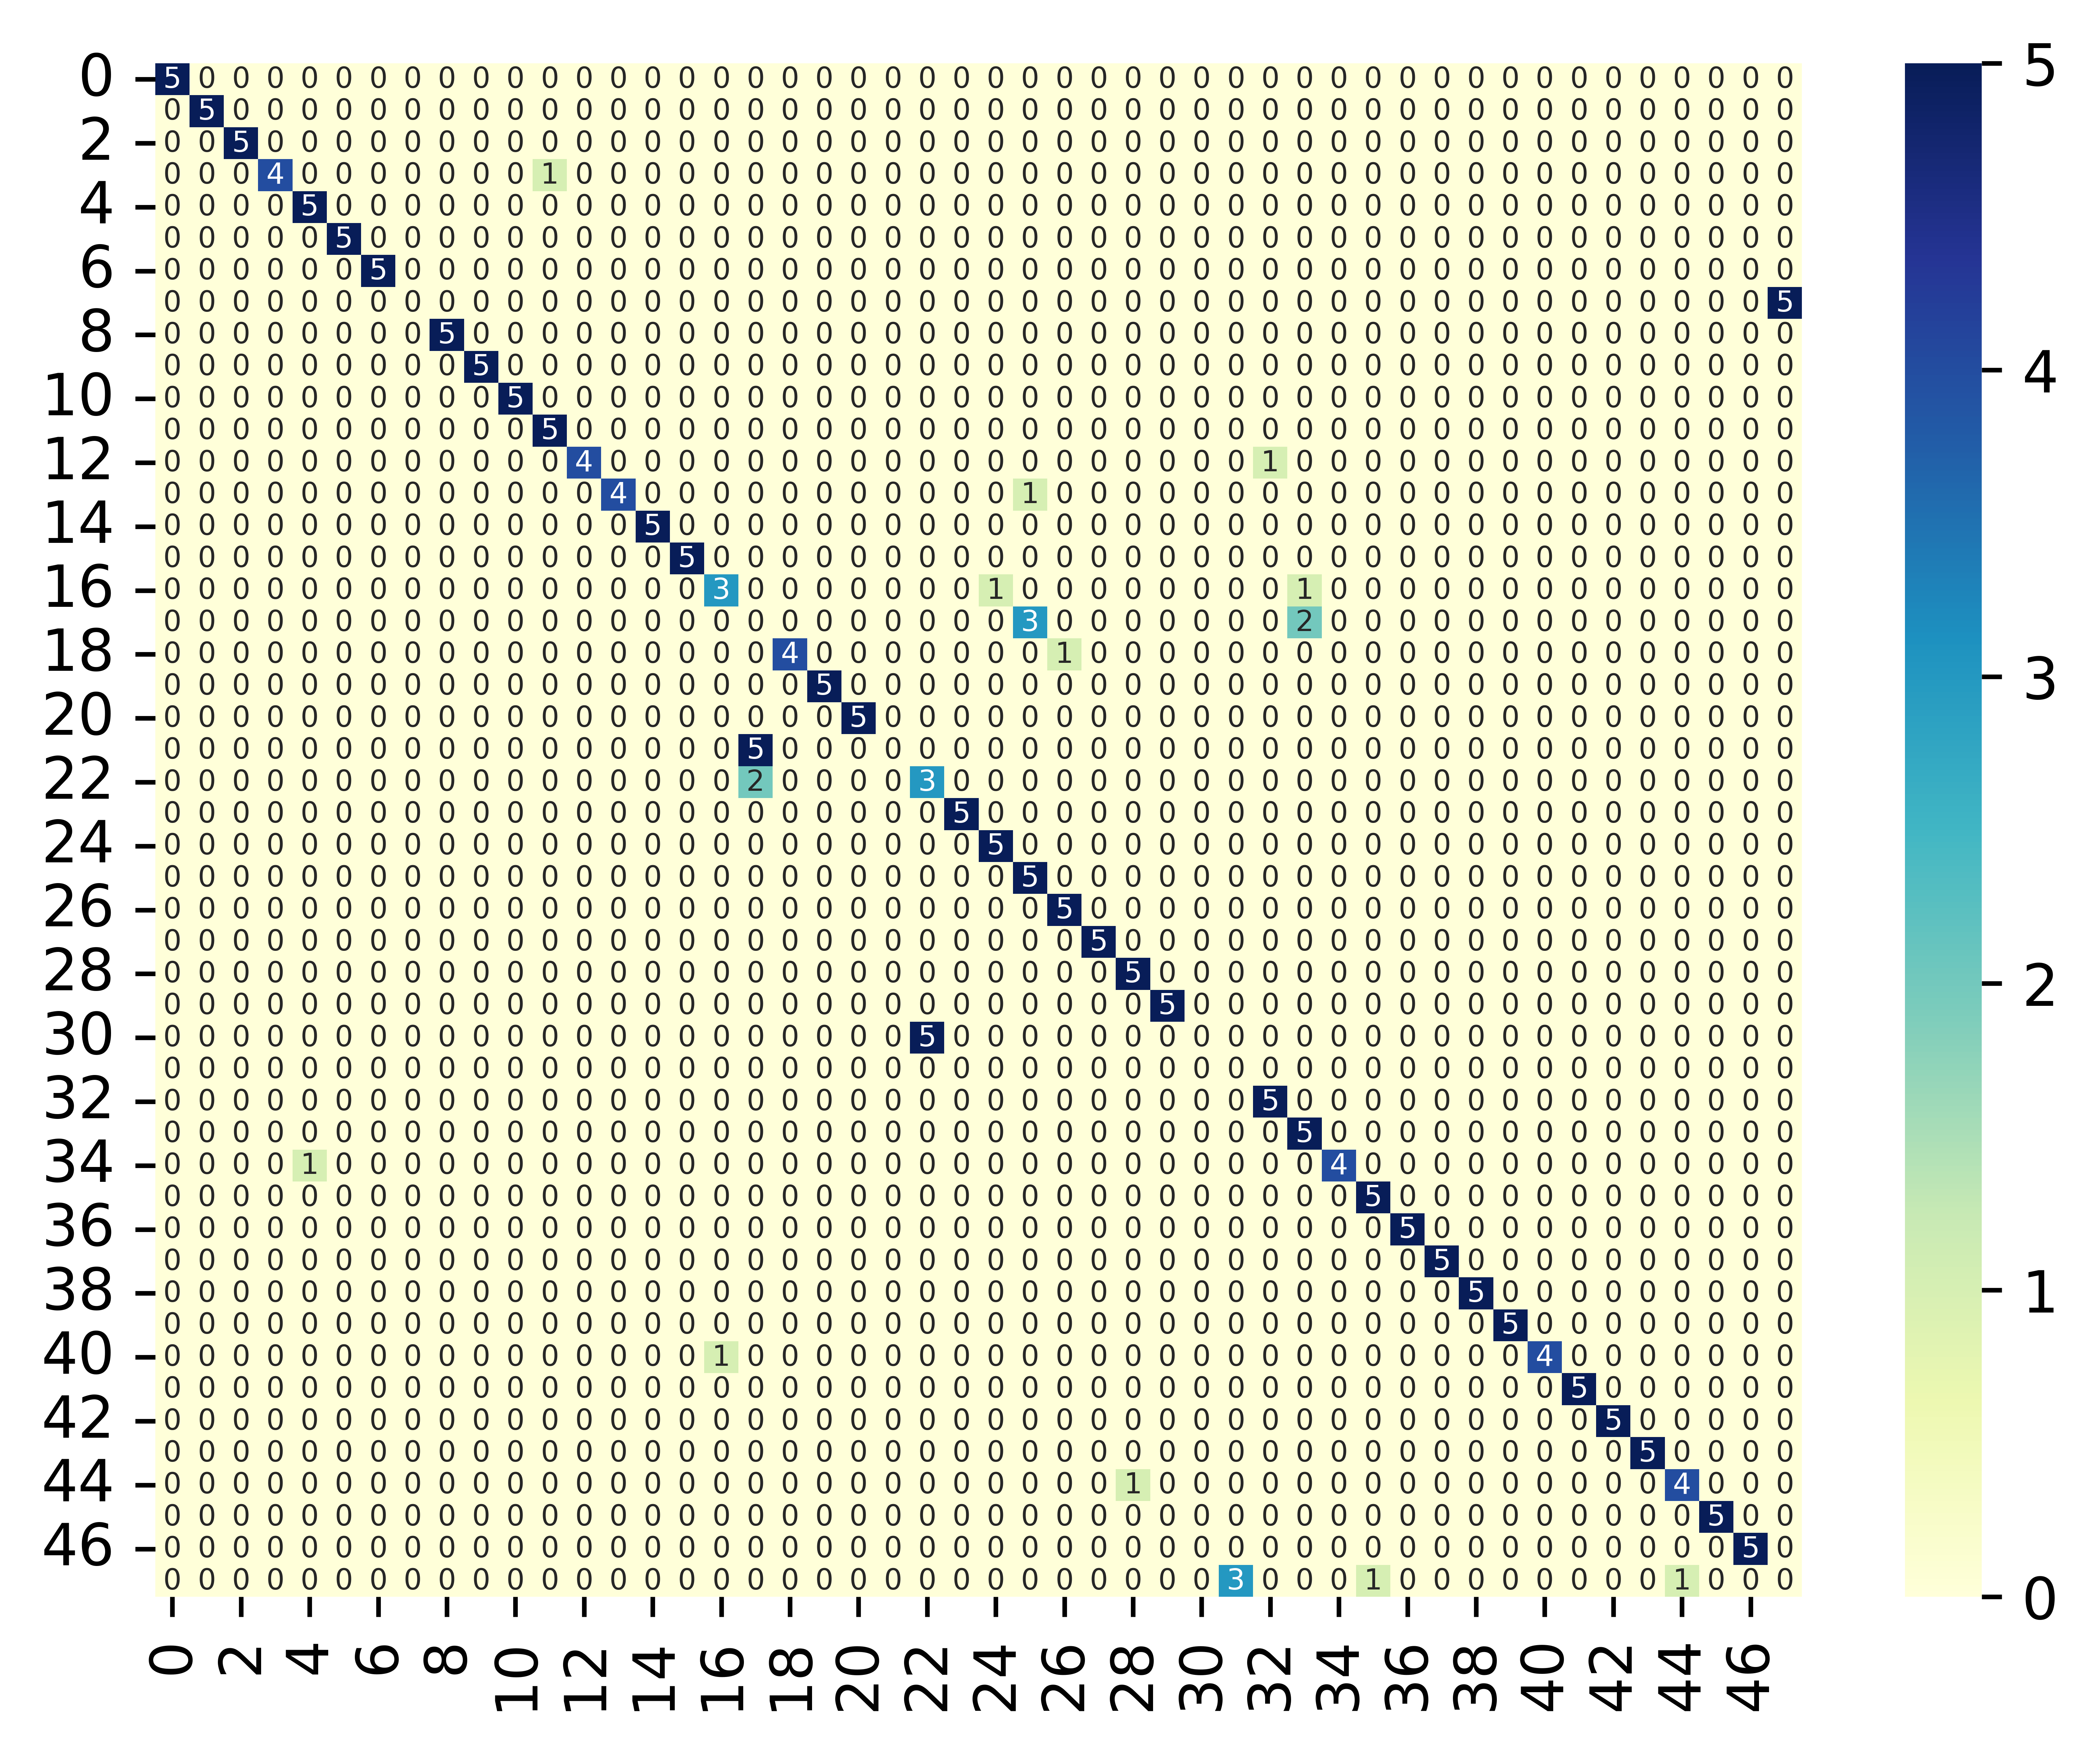

In [ ]:
import seaborn as sns
figure = plt.figure(dpi=1200)
sns.heatmap(cm, annot=True, cmap = 'YlGnBu', annot_kws={"size":5})